In this notebook, we will identify which features of the automobile have an impact on its price.

### Task 1: Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import f_oneway

### Task 2: Importing dataset

In [2]:
df_auto = pd.read_csv('data/auto.csv')
df_auto_clean = pd.read_csv('data/auto_clean.csv')

Here we have two data sets, auto and auto_clean, auto_clean.csv is the cleaned and formatted version of auto.csv. I will be using auto.csv and cleaning it as per my requirement. I will compare the column names from auto_clean.csv dataset to set column names for auto.csv

In [3]:
print(f'auto_clean.csv columns = {df_auto_clean.columns}')
print(f'auto.csv columns = {df_auto.columns}')

print(len(df_auto_clean.columns))
print(len(df_auto.columns))

auto_clean.csv columns = Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')
auto.csv columns = Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.6', '168.8', '64.1', '48.8', '2548', 'dohc', 'four', '130',
       'mpfi', '3.47', '2.68', '9.0', '111', '5000', '21', '27', '13495'],
      dtype='object')
29
26


When compared the columns and their values from both the datasets, there were few additionally modified columns were added in auto_clean dataset.

In [4]:
df_auto.columns = ['symboling', 'normalized-losses', 'make', 'fuel', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [5]:
df_auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
# modifying column names
df_auto.columns = df_auto.columns.str.replace('-','_')
df_auto.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [7]:
df_auto.head()

,symboling,normalized_losses,make,fuel,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Task 3: Cleaning dataset

In [8]:
# filling '?' with NaN
df_auto.replace('?',np.nan, inplace = True)
df_auto.replace([np.inf, -np.inf], np.nan, inplace = True)

Since, we have to find the features that are relevent to predict the price of an automobile, we need to first find the null values in price column. IF there are any null values in the price column, we will drop those rows

In [9]:
df_auto['price'].isna().value_counts()

price
False    200
True       4
Name: count, dtype: int64

In [10]:
df_auto = df_auto.dropna(subset = ['price'], axis = 0)

In [11]:
df_auto.shape

(200, 26)

Now we will fill the missing values of each column with the mean of the respective column values

In [12]:
df_auto.isna().sum()

symboling             0
normalized_losses    36
make                  0
fuel                  0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

From the above we can see that, normalized_losses, num_of_doors, bore, stroke, horsepower, peak_rpm has null values. 

In [13]:
df_auto.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel                  object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

We will now replace these NaN values with their mean

In [15]:
# normalized_losses- datatype- object
avg_normalized_losses = df_auto['normalized_losses'].astype('float').mean().round(2)
print(f'Average value of normalized_losses is {avg_normalized_losses}')
df_auto['normalized_losses'].replace(np.nan,avg_normalized_losses, inplace = True)

# bore- datatype- object
avg_bore = df_auto['bore'].astype('float').mean().round(2)
print(f'Average value of bore is {avg_bore}')
df_auto['bore'].replace(np.nan,avg_bore, inplace = True)

# stroke- datatype- object
avg_stroke = df_auto['stroke'].astype('float').mean().round(2)
print(f'Average value of stroke is {avg_stroke}')
df_auto['stroke'].replace(np.nan,avg_stroke, inplace = True)

# horsepower- datatype- object
avg_horsepower = df_auto['horsepower'].astype('float').mean().round(2)
print(f'Average value of avg_horsepower is {avg_horsepower}')
df_auto['horsepower'].replace(np.nan,avg_horsepower, inplace = True)

# peak_rpm: datatype- object
avg_peak_rpm = df_auto['peak_rpm'].astype('float').mean().round(2)
print(f'Average value of peak_rpm is {avg_peak_rpm}')
df_auto['peak_rpm'].replace(np.nan,avg_peak_rpm, inplace = True)

Average value of normalized_losses is 122.0
Average value of bore is 3.33
Average value of stroke is 3.26
Average value of avg_horsepower is 103.36
Average value of peak_rpm is 5118.18


In [16]:
df_auto.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel                 0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Now we'll fill the missing values in num_of_doors with the most-repeated value

In [17]:
df_auto['num_of_doors'].value_counts()

num_of_doors
four    113
two      85
Name: count, dtype: int64

In [18]:
df_auto['num_of_doors'].replace(np.nan, 'four', inplace = True)
df_auto.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel                 0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [19]:
df_auto.isin([np.inf, -np.inf]).any()

symboling            False
normalized_losses    False
make                 False
fuel                 False
aspiration           False
num_of_doors         False
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                 False
stroke               False
compression_ratio    False
horsepower           False
peak_rpm             False
city_mpg             False
highway_mpg          False
price                False
dtype: bool

In [20]:
display(df_auto.head())
df_auto.info()

,symboling,normalized_losses,make,fuel,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel               200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non-null

In [21]:
df_auto[['normalized_losses','length','width','height','bore','stroke','horsepower','peak_rpm','price']] = \
df_auto[['normalized_losses','length','width','height','bore','stroke','horsepower','peak_rpm','price']].astype('float')
df_auto.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel                  object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

### Data analyis of numeric features

### Task 4: Feature Selection

In [22]:
df_auto_corr = df_auto.select_dtypes(include = ['int64','float64']).corr()

In [23]:
df_auto_corr

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145667,0.008261,-0.181073,0.074594,0.284011,-0.030158,0.041248,-0.083327
normalized_losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029867,0.055768,-0.114738,0.217323,0.239580,-0.225255,-0.182011,0.133999
wheel_base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501534,0.144669,0.249689,0.375688,-0.364971,-0.480029,-0.552211,0.589147
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610817,0.120883,0.159203,0.580515,-0.286754,-0.667658,-0.700186,0.691044
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548478,0.182854,0.189008,0.617062,-0.247388,-0.638155,-0.684700,0.752795
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187794,-0.081290,0.259526,-0.085763,-0.315756,-0.057087,-0.111568,0.137284
curb_weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644532,0.168639,0.156444,0.758089,-0.279411,-0.750390,-0.795515,0.834420
engine_size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572786,0.207991,0.029005,0.822669,-0.256702,-0.651002,-0.679877,0.872337
bore,-0.145667,-0.029867,0.501534,0.610817,0.548478,0.187794,0.644532,0.572786,1.000000,-0.051087,0.002021,0.566737,-0.267010,-0.581365,-0.590753,0.543431
stroke,0.008261,0.055768,0.144669,0.120883,0.182854,-0.081290,0.168639,0.207991,-0.051087,1.000000,0.186759,0.100549,-0.066155,-0.040690,-0.040293,0.083295


In [24]:
# since out target variable is 'price', we will check for corelation between other features with respect to 'price'
df_auto_corr_price = df_auto_corr.loc[:,'price']
df_auto_corr_price.to_frame()
df_auto_corr_price.index
df_auto_corr_price

symboling           -0.083327
normalized_losses    0.133999
wheel_base           0.589147
length               0.691044
width                0.752795
height               0.137284
curb_weight          0.834420
engine_size          0.872337
bore                 0.543431
stroke               0.083295
compression_ratio    0.071176
horsepower           0.809736
peak_rpm            -0.101519
city_mpg            -0.687186
highway_mpg         -0.705115
price                1.000000
Name: price, dtype: float64

In [25]:
# here we will take the threshold value of correlation as 0.3, we can take other value too, but in this case, i will take as 0.3
price_feature = []
threshold = 0.3
for i in df_auto_corr_price.index:
    if abs(df_auto_corr_price[i]) > threshold:
        price_feature.append(i)

In [26]:
price_feature

['wheel_base',
 'length',
 'width',
 'curb_weight',
 'engine_size',
 'bore',
 'horsepower',
 'city_mpg',
 'highway_mpg',
 'price']

In [27]:
# from above corelation, we can see that these features can have an impact on the automobile price

### Task 5: Data visualization

In [28]:
# now let us group in these features into 2 categories for simplicity
# category 1: wheel-base, length, width, curb-weight, engine-size, bore
# category 2: horsepower, city-mpg, highway-mpg, city-L/100km

In [29]:
category1 = df_auto[['price','wheel_base','length','width','curb_weight','engine_size','bore']]
category2 = df_auto[['price','horsepower','city_mpg','highway_mpg']]
category1

,price,wheel_base,length,width,curb_weight,engine_size,bore
0,16500.0,88.6,168.8,64.1,2548,130,3.47
1,16500.0,94.5,171.2,65.5,2823,152,2.68
2,13950.0,99.8,176.6,66.2,2337,109,3.19
3,17450.0,99.4,176.6,66.4,2824,136,3.19
4,15250.0,99.8,177.3,66.3,2507,136,3.19
...,...,...,...,...,...,...,...
199,16845.0,109.1,188.8,68.9,2952,141,3.78
200,19045.0,109.1,188.8,68.8,3049,141,3.78
201,21485.0,109.1,188.8,68.9,3012,173,3.58
202,22470.0,109.1,188.8,68.9,3217,145,3.01


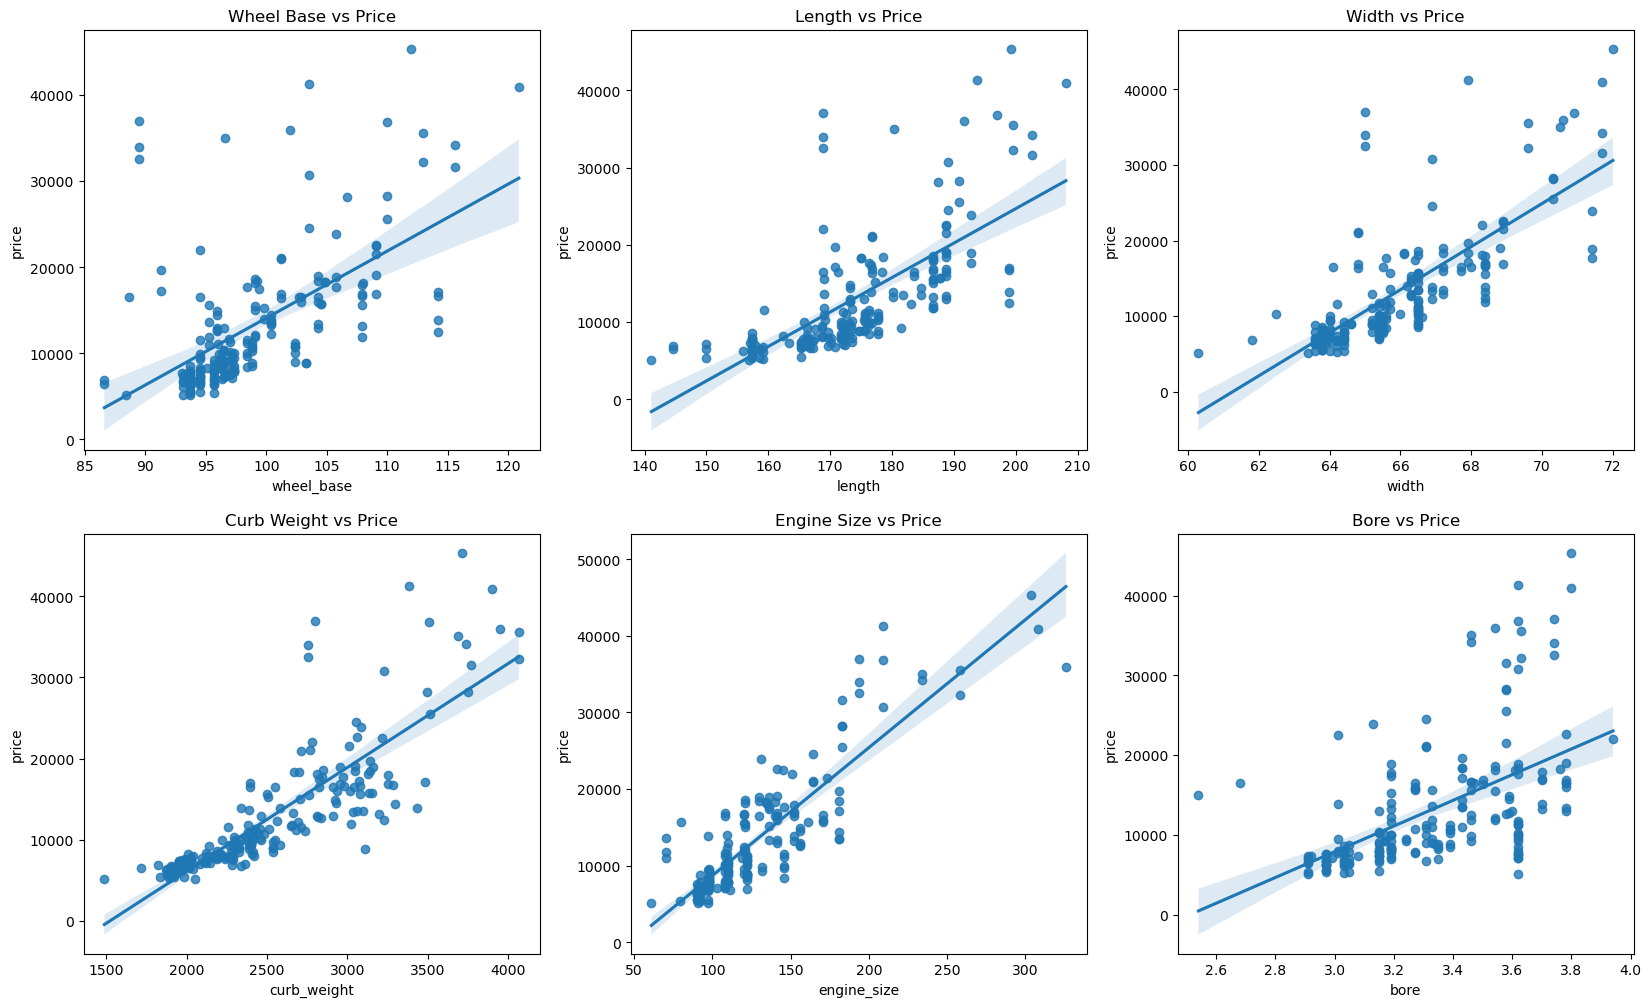

In [30]:
# let us visualize the features vs price in category 1
# category 1: wheel-base, length, width, curb-weight, engine-size, bore
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.regplot(x = 'wheel_base', y = 'price', data = category1)
plt.title('Wheel Base vs Price')

plt.subplot(2,3,2)
sns.regplot(x = 'length', y = 'price', data = category1)
plt.title('Length vs Price')

plt.subplot(2,3,3)
sns.regplot(x = 'width', y = 'price', data  = category1)
plt.title('Width vs Price')

plt.subplot(2,3,4)
sns.regplot(x = 'curb_weight', y = 'price', data  = category1)
plt.title('Curb Weight vs Price')

plt.subplot(2,3,5)
sns.regplot(x = 'engine_size', y = 'price', data  = category1)
plt.title('Engine Size vs Price')

plt.subplot(2,3,6)
sns.regplot(x = 'bore', y = 'price', data  = category1)
plt.title('Bore vs Price');

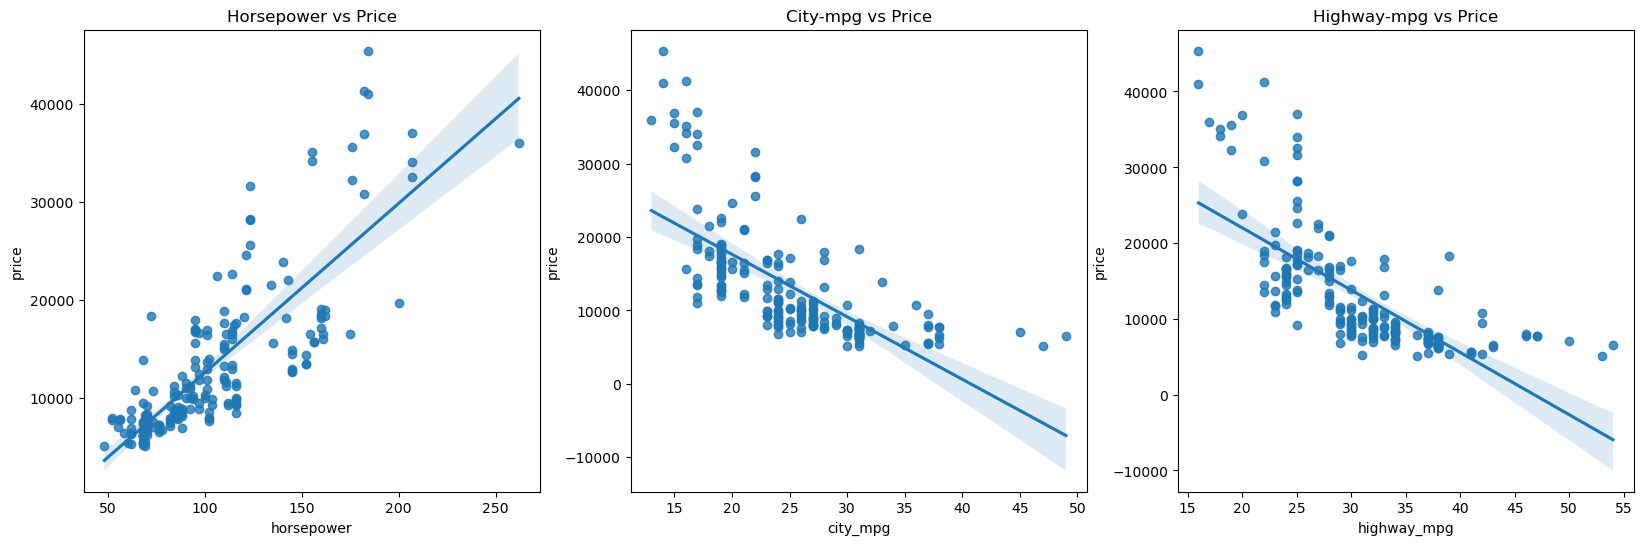

In [31]:
# now lets visualize features vs price of category 2
# category 2: horsepower, city-mpg, highway-mpg
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
sns.regplot(x = 'horsepower', y = 'price', data = category2)
plt.title('Horsepower vs Price')

plt.subplot(1,3,2)
sns.regplot(x = 'city_mpg', y = 'price', data = category2)
plt.title('City-mpg vs Price')

plt.subplot(1,3,3)
sns.regplot(x = 'highway_mpg', y = 'price', data  = category2)
plt.title('Highway-mpg vs Price');

From the above graphs from category 1 and category 2, we can see that most of them have positive slope and some have negative slope. The slope of a graph is directly linked with the positive and negative correlation. 

For positive correlation, the graphs that have positive slope, as the value of feature increases, the price also increases. Similarly we can observe for negative correlation. Higher the slope (either positive or negative), stronger is the correlation. This can also be seen from the correlation matrix.

Positive relationship: wheel-base, length, width, curb-weight, engine-size, bore, horsepower
Negative relationship: city-mpg, highway-mpg

Now, since we have seen the relationship of these features with respect to price, let us find from the graph, the range of values of these features that directly affects the price

C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='width', ylabel='Count'>

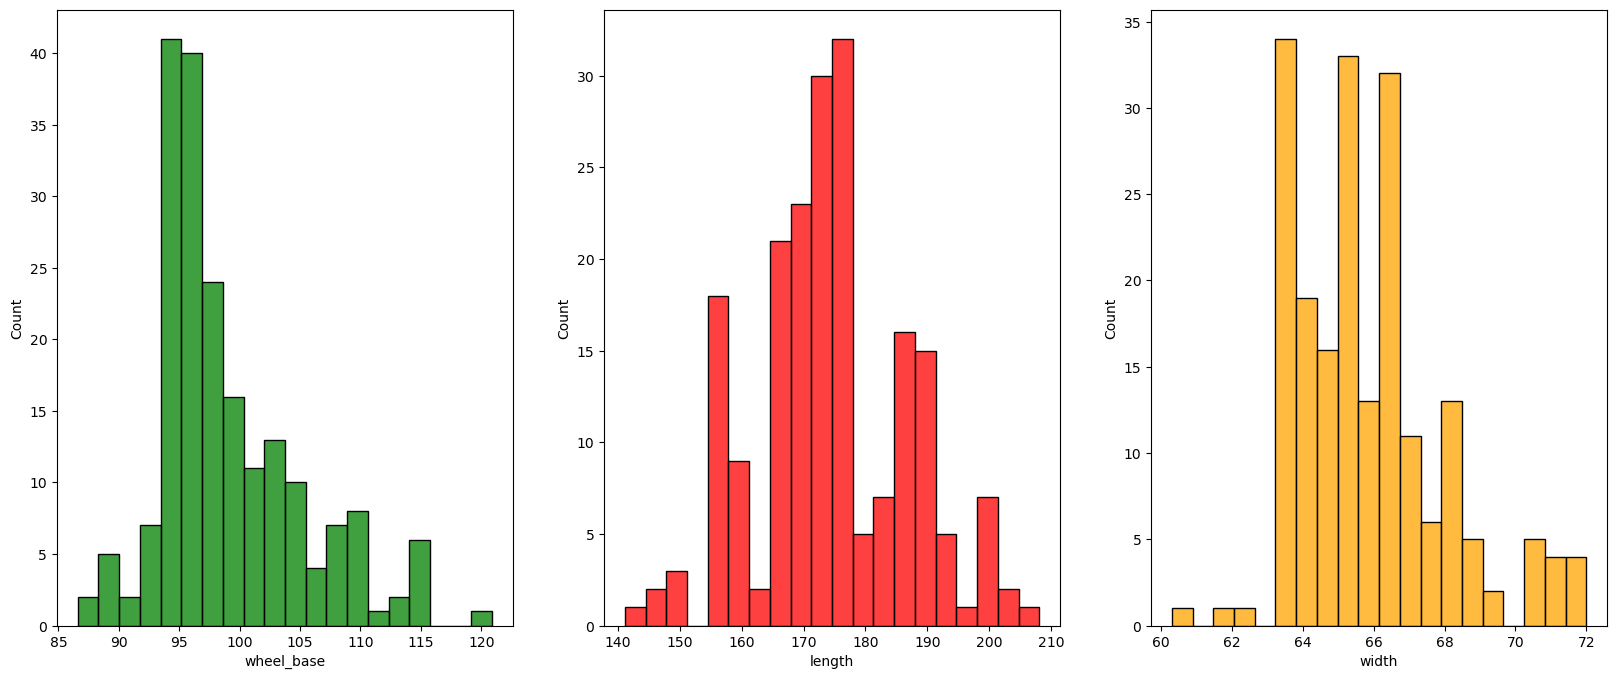

In [32]:
fig, axes = plt.subplots(1,3, figsize = (20,8))
sns.histplot(x = 'wheel_base', data = category1,bins = 20, ax = axes[0], color = 'green')

sns.histplot(x = 'length', data = category1, bins = 20, ax = axes[1], color = 'red')

sns.histplot(x = 'width', data = category1, bins = 20, ax = axes[2], color = 'orange')

From the above three graphs we can interpret that:
1. For wheel-base vs price:
   range = [92,110]
2. For length vs price:
   range = [155,191]
3. For width vs price:
   range = [63,68.5]

C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bore', ylabel='Count'>

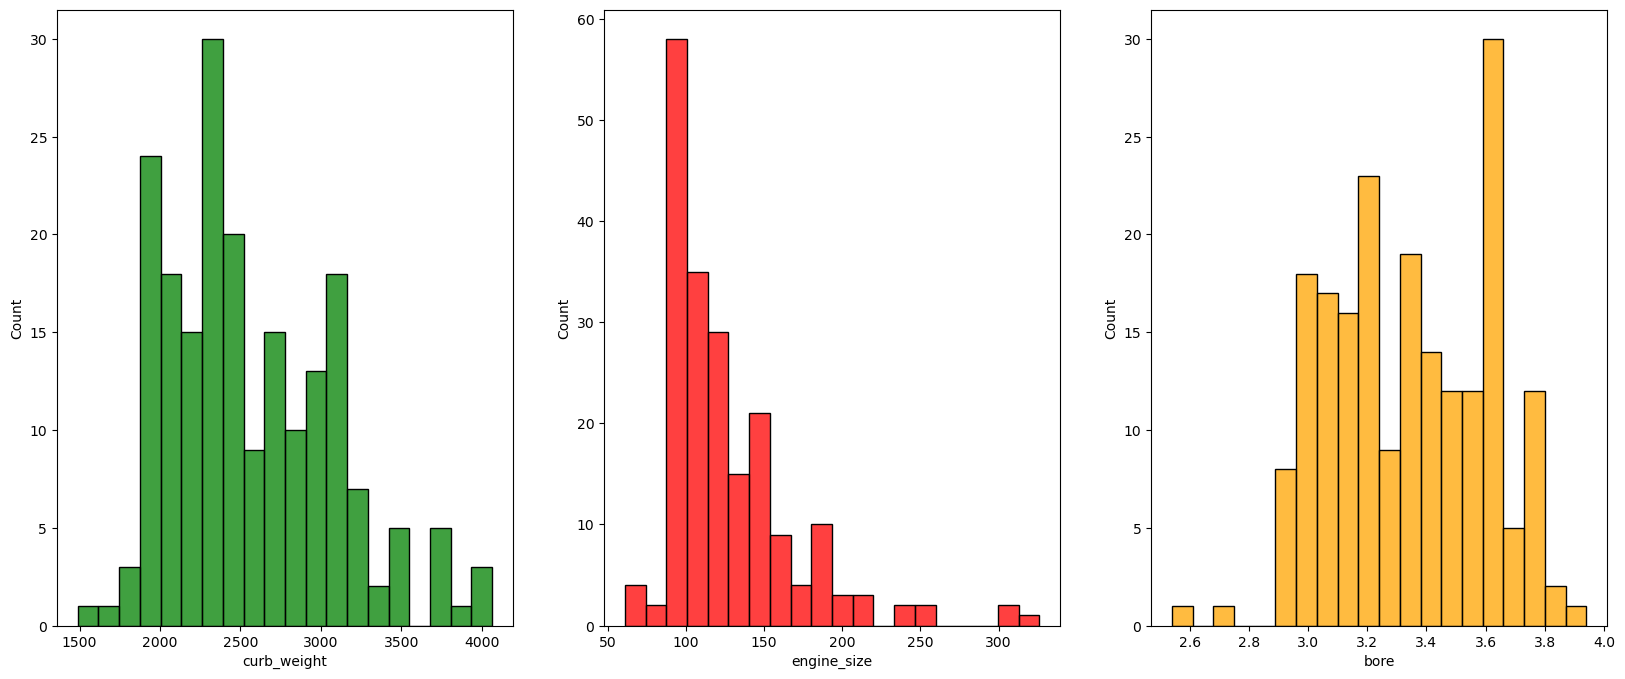

In [33]:
# category 1:  curb-weight, engine-size, bore
fig, axes = plt.subplots(1,3, figsize = (20,8))
sns.histplot(x = 'curb_weight', data = category1,bins = 20, ax = axes[0], color = 'green')

sns.histplot(x = 'engine_size', data = category1, bins = 20, ax = axes[1], color = 'red')

sns.histplot(x = 'bore', data = category1, bins = 20, ax = axes[2], color = 'orange')

From the above three graphs we can interpret that:
1. For curb-weight vs price:
   range = [1800,3200]
2. For engine-size vs price:
   range = [90,160]
3. For bore vs price:
   range = [2.9,3.8]

C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bhana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='highway_mpg', ylabel='Count'>

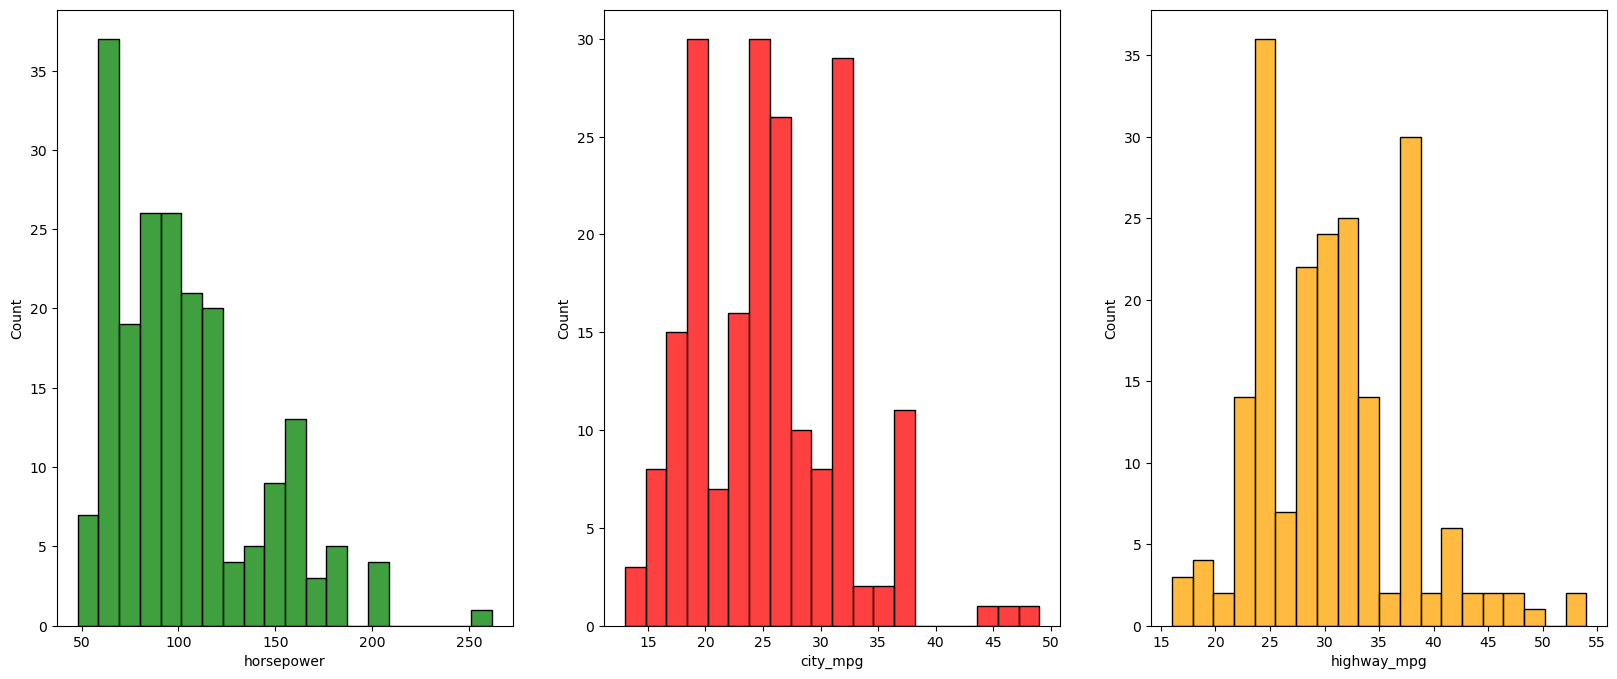

In [34]:
# category 2: horsepower, city-mpg, highway-mpg, city-L/100km
fig, axes = plt.subplots(1,3, figsize = (20,8))
sns.histplot(x = 'horsepower', data = category2, bins = 20, ax = axes[0], color = 'green')

sns.histplot(x = 'city_mpg', data = category2, bins = 20, ax = axes[1], color = 'red')

sns.histplot(x = 'highway_mpg', data = category2, bins = 20, ax = axes[2], color = 'orange')

From the above three graphs we can interpret that:
1. For horsepower vs price:
   range = [50,160]
2. For city-mpg vs price:
   range = [15,38]
3. For highway-mpg vs price:
   range = [22,43]
   
Now, as we have seen how the visualization of features with higher correlation looks like, let us now visualize how features having lower corrrelation with target variable looks like.

We will categorize these features into category 3

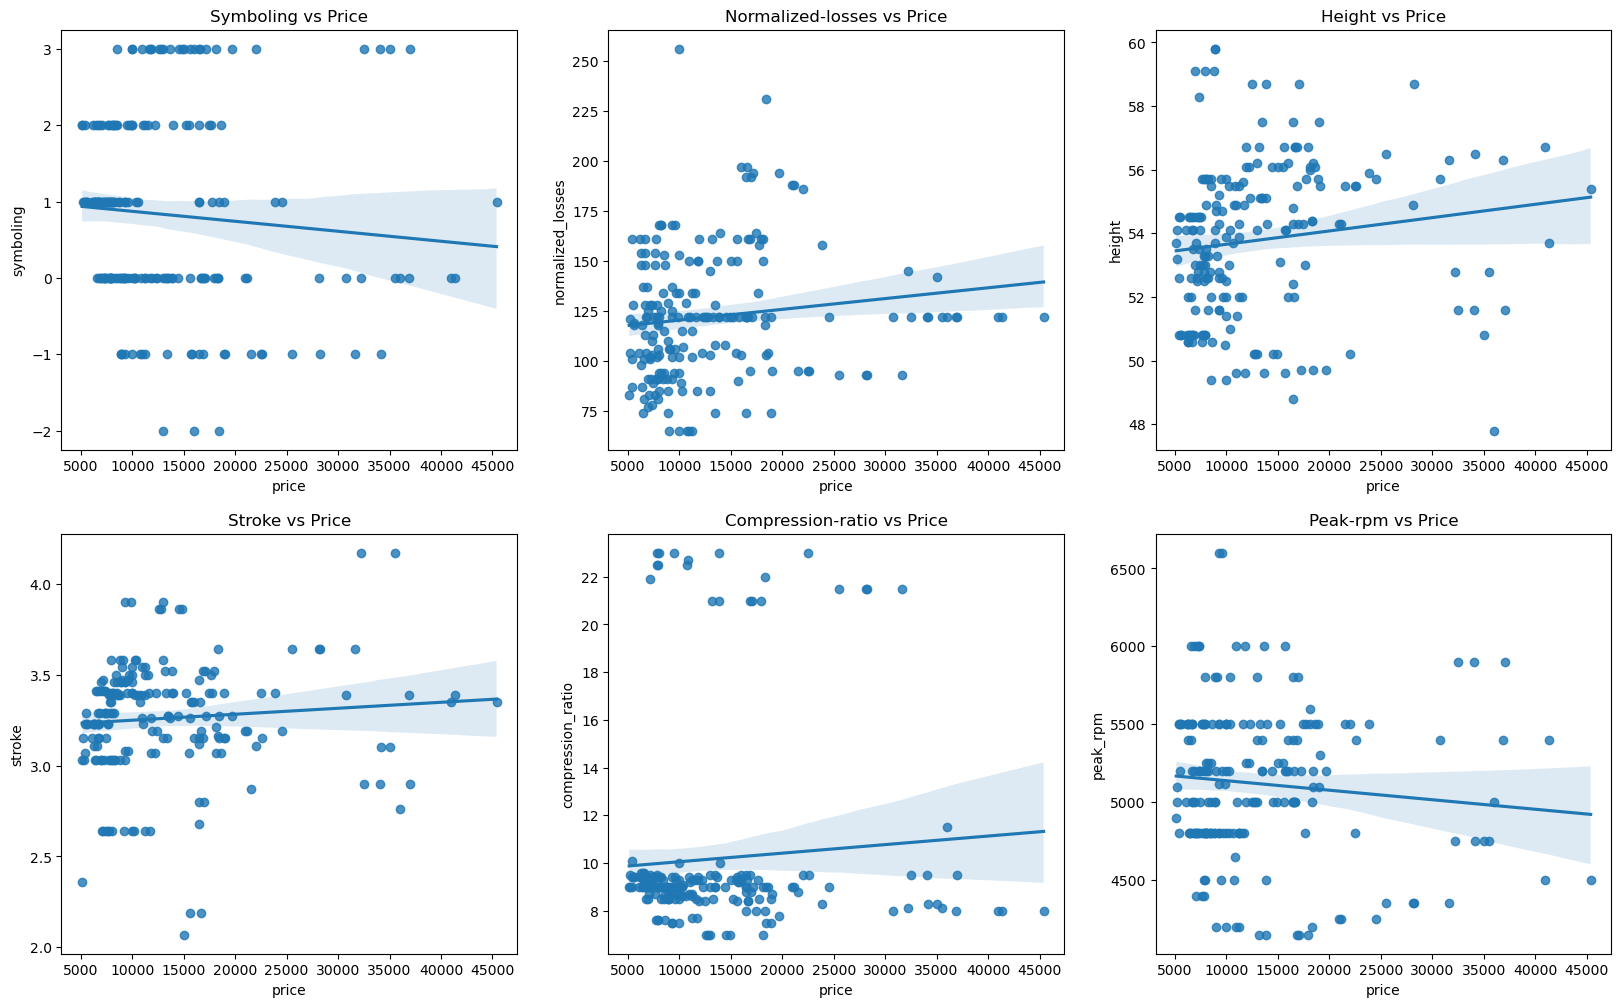

In [35]:
category3 = df_auto[['symboling','normalized_losses','height','stroke','compression_ratio','peak_rpm','price']]

plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.regplot(x = 'price', y = 'symboling', data = category3)
plt.title('Symboling vs Price')

plt.subplot(2,3,2)
sns.regplot(x = 'price', y = 'normalized_losses', data = category3)
plt.title('Normalized-losses vs Price')

plt.subplot(2,3,3)
sns.regplot(x = 'price', y = 'height', data = category3)
plt.title('Height vs Price')

plt.subplot(2,3,4)
sns.regplot(x = 'price', y = 'stroke', data = category3)
plt.title('Stroke vs Price')

plt.subplot(2,3,5)
sns.regplot(x = 'price', y = 'compression_ratio', data = category3)
plt.title('Compression-ratio vs Price')

plt.subplot(2,3,6)
sns.regplot(x = 'price', y = 'peak_rpm', data = category3)
plt.title('Peak-rpm vs Price');

From the above graphs, we can see that there is no particular relationship between features in catoegory 3 and target variables. The points in these graphs are either very scatter or do not pass through the regression line

### Data analysis of categorical features

Let us first create a dataset for categorical features

In [36]:
numeric_features_price = list(category1.columns) + list(category2.columns) + list(category3.columns)

# Remove 'price' from numeric_features
numeric_features = [feature for feature in set(numeric_features_price) if feature != 'price']

# Define categorical features as the difference between df_auto.columns and numeric_features
cat_columns = list(set(df_auto.columns) - set(numeric_features))

cat_columns

['body_style',
 'num_of_cylinders',
 'price',
 'engine_location',
 'fuel',
 'num_of_doors',
 'fuel_system',
 'aspiration',
 'make',
 'engine_type',
 'drive_wheels']

In [37]:
cat_features = df_auto[cat_columns].copy()
cat_features.head()

,body_style,num_of_cylinders,price,engine_location,fuel,num_of_doors,fuel_system,aspiration,make,engine_type,drive_wheels
0,convertible,four,16500.0,front,gas,two,mpfi,std,alfa-romero,dohc,rwd
1,hatchback,six,16500.0,front,gas,two,mpfi,std,alfa-romero,ohcv,rwd
2,sedan,four,13950.0,front,gas,four,mpfi,std,audi,ohc,fwd
3,sedan,five,17450.0,front,gas,four,mpfi,std,audi,ohc,4wd
4,sedan,five,15250.0,front,gas,two,mpfi,std,audi,ohc,fwd


### Task 6: Feature selection

In [38]:
[cat_features[cnt].value_counts() for cnt in cat_columns if cnt != 'price']

[body_style
 sedan          94
 hatchback      68
 wagon          25
 hardtop         8
 convertible     5
 Name: count, dtype: int64,
 num_of_cylinders
 four      156
 six        24
 five       10
 two         4
 eight       4
 three       1
 twelve      1
 Name: count, dtype: int64,
 engine_location
 front    197
 rear       3
 Name: count, dtype: int64,
 fuel
 gas       180
 diesel     20
 Name: count, dtype: int64,
 num_of_doors
 four    115
 two      85
 Name: count, dtype: int64,
 fuel_system
 mpfi    91
 2bbl    64
 idi     20
 1bbl    11
 spdi     9
 4bbl     3
 mfi      1
 spfi     1
 Name: count, dtype: int64,
 aspiration
 std      164
 turbo     36
 Name: count, dtype: int64,
 make
 toyota           32
 nissan           18
 mazda            17
 mitsubishi       13
 honda            13
 volkswagen       12
 subaru           12
 peugot           11
 volvo            11
 dodge             9
 mercedes-benz     8
 bmw               8
 plymouth          7
 audi              6
 saa

From the above data, we can see that fuel, aspiration and engine_location have skewed data. so these features will not be used for prediction process.

In [39]:
cat_features.drop(columns = ['fuel','aspiration','engine_location'],inplace = True)

In [40]:
cat_features.describe(include = 'object')

,body_style,num_of_cylinders,num_of_doors,fuel_system,make,engine_type,drive_wheels
count,200,200,200,200,200,200,200
unique,5,7,2,8,22,6,3
top,sedan,four,four,mpfi,toyota,ohc,fwd
freq,94,156,115,91,32,145,118


### Task 7: Statistical analysis

To analyse these features we will use one-way ANOVA method. It calculates f-statistics and p-value. We will set the threshold p-value as 0.05 (which means that the probability of less than 5% is acceptable to consider the feature having significant relationship with the target variable.

In [41]:
reqd_features = []
for cat in cat_features.columns:
    # excluding the column named 'price'
    if cat != 'price':
        # finding unique values in each categorical feature
        for value in cat_features[cat].unique(): 
            # grouping features based on unique values
            group_df = cat_features[[cat,'price']].groupby([cat])
            
            unique_list = []
            
            for i in range(len(cat_features[cat].unique())):
                unique_values = cat_features[cat].unique()[i]
                
                unique_list.append(group_df.get_group(unique_values)['price'])
         # calculating f_stat and p_values   
        f_stat,p_value = f_oneway(*unique_list)
    
        # printing f_stat and p_value for each categorical features
        print(f'{cat}: \nF_stat value = {f_stat} \nP_value = {p_value}\n')
        
        # adding categorical feature 'cat' to the reqd_features list if the p_value is less that 0.05
        if p_value < 0.05:
            reqd_features.append(cat)
        
reqd_features

body_style: 
F_stat value = 9.544875246787733 
P_value = 4.550871253821208e-07

num_of_cylinders: 
F_stat value = 54.85052503306057 
P_value = 3.7895033954362185e-39

num_of_doors: 
F_stat value = 0.36317826899009914 
P_value = 0.5474359678066852

fuel_system: 
F_stat value = 15.035021513654641 
P_value = 1.3329439920204686e-15

make: 
F_stat value = 33.14334525797472 
P_value = 1.8378308155431494e-50

engine_type: 
F_stat value = 9.906825839260755 
P_value = 1.877589587512153e-08

drive_wheels: 
F_stat value = 68.49603532807176 
P_value = 2.6116313994533863e-23



['body_style',
 'num_of_cylinders',
 'fuel_system',
 'make',
 'engine_type',
 'drive_wheels']

As per the one_way ANOVA test, we see that Positive relationship: wheel-base, length, width, curb-weight, engine-size, bore, horsepower
Negative relationship: city-mpg, highway-mpg have significant relationship with the target variable as the p_value of these features is less than the threshold value (0.05)

### Summary:

From the above data analysis, we can conclude that:

There are features which showed positive relationship with the target variables (price), which means that as the value of these features increases, the value of target variable also increases. These features include wheel-base, length, width, curb-weight, engine-size, bore and horsepower. 

There are two features in the dataset that show negative relationship with the target variable (price), which means that as the value of these features increases, the price decreases. These features include city-mpg and highway-mpg. 

For categorical features, we have used one way ANOVA to analyze the data. Based on the findings, we have found out that drive_wheels, fuel_system, engine_type, body_style, num_of_cylinders and make shows significant relationship with the target variable.